In [1]:
import pandas as pd
import Utils
import Preprocess
import RetrievalMethods

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/apostolos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read Data - Preprocessing - Statistics Extraction

In [2]:
passage_collection_file = '../dataset/passage_collection_new.txt'
test_queries_file = '../dataset/test-queries.tsv'
candidate_passages_top1000_file = '../dataset/candidate_passages_top1000.tsv'

In [3]:
passage_collection = Utils.read_collection(passage_collection_file)

In [4]:
### preprocess the passage sentences
preprocessed_passages = Preprocess.process_data(passage_collection,lemm = False)

In [5]:
print(preprocessed_passages[0:3])

[['this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'this', 'is', 'the', 'definition', 'of', 'rna', 'along', 'with', 'examples', 'of', 'types', 'of', 'rna', 'molecules', 'rna', 'definition'], ['best', 'answer', 'the', 'ar', 'designation', 'comes', 'from', 'the', 'name', 'of', 'the', 'company', 'that', 'produced', 'the', 'firearm', 'armalite', 'it', 'is', 'a', 'common', 'misconception', 'that', 'it', 'stands', 'for', 'assault', 'rifle', 'from', 'wikipedia', 'the', 'ar', '15', 'is', 'based', 'on', 'the', '7', '62mm', 'ar', '10', 'designed', 'by', 'eugene', 'stoner', 'of', 'the', 'fairchild', 'armalite', 'corporation'], ['what', 'does', 'ar', 'really', 'mean', 'posted', 'by', 'quality', 'ar', 'barrels', 'jul', '29', '2016', 'ar', 'articles', 'over', 'the', 'years', 'the', 'media', 'has', 'programmed', 'the', 'public', 'into', 'thinking', 'that', 'ar', 'stands', 'for', 'assault', 'rifle', 'this', 'is', 'not', 'the', 'case'

In [6]:
## find the frquency of each word on th passage collection
ordered_term_frequency_dictionary,total_words = Utils.derive_frequencies_from_collection(preprocessed_passages)

In [7]:
ordered_term_frequency_dictionary

[('the', 626892),
 ('of', 334283),
 ('a', 283558),
 ('and', 255211),
 ('to', 240943),
 ('is', 216851),
 ('in', 202175),
 ('for', 108167),
 ('or', 86924),
 ('you', 86652),
 ('that', 81084),
 ('are', 77176),
 ('it', 69548),
 ('on', 68236),
 ('as', 67752),
 ('your', 61565),
 ('with', 59497),
 ('s', 56348),
 ('by', 52045),
 ('an', 50108),
 ('can', 49971),
 ('be', 49110),
 ('from', 47956),
 ('1', 43967),
 ('this', 43533),
 ('at', 39432),
 ('2', 33875),
 ('have', 33377),
 ('not', 31856),
 ('if', 30447),
 ('will', 27760),
 ('one', 27299),
 ('was', 27110),
 ('which', 25851),
 ('name', 25102),
 ('i', 23897),
 ('more', 23607),
 ('has', 23295),
 ('3', 22569),
 ('also', 21757),
 ('but', 21569),
 ('when', 21533),
 ('number', 21351),
 ('all', 20578),
 ('may', 20556),
 ('other', 19958),
 ('most', 19822),
 ('about', 18979),
 ('they', 18620),
 ('there', 17480),
 ('cost', 17128),
 ('how', 16568),
 ('used', 16542),
 ('than', 16226),
 ('first', 16111),
 ('what', 15968),
 ('4', 15267),
 ('blood', 15117),
 

R^2 coefficient is: 0.9806957054501977
Linear Model Weight: -1.6509141751716523
Linear Model Bias: 2.9750585157493923


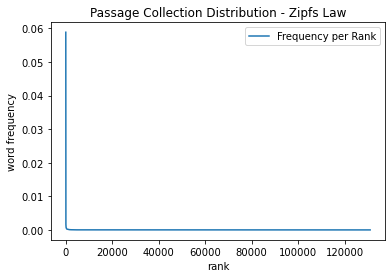

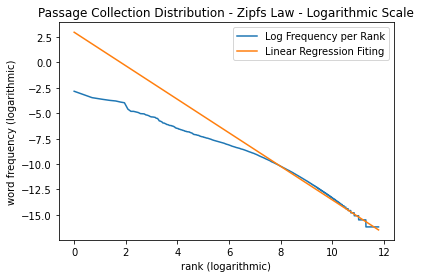

Mean Value: 0.023589156248150025
Std: 0.02364160593247986


In [8]:
Utils.plot_word_frequencies(ordered_term_frequency_dictionary,total_words)

In [ ]:
## read the data
test_queries_df = pd.read_csv(test_queries_file, sep='\t', lineterminator='\n')
candidate_passages_top1000_df = pd.read_csv(candidate_passages_top1000_file, sep='\t', lineterminator='\r')

In [ ]:
## set column names
test_queries_df.columns = ['qid','query']
candidate_passages_top1000_df.columns = ['qid','pid','query','passage']

In [ ]:
test_queries_df.head()

In [ ]:
candidate_passages_top1000_df.head()

## Retrieval Models and Experiments

In [ ]:
## create dictionaries with the data_given
query_dict, test_queries_dict, passages_dict, query_passage_dict = Utils.get_dictionaries(candidate_passages_top1000_df,test_queries_df)

In [ ]:
## preprocess the query
preprocessed_queries_dict = Utils.preprocess_queries(test_queries_dict)

In [ ]:
RetrievalMethods.Retrieval_Pipeline(preprocessed_queries_dict,passages_dict,query_passage_dict,'Lindstone',0.5)

In [ ]:
preprocessed_queries_dict.get(1112389)

In [ ]:
passages_dict.get(3570708.0)